In [1]:
# 구글 마운트 후
# 파일위치 지정
%cd /content/drive/MyDrive/LGDXSCHOOL 2기/DeepLearning

/content/drive/MyDrive/LGDXSCHOOL 2기/DeepLearning


### 학습목표
- 다중분류를 하는 딥러닝 모델을 설계하자
- 손글씨 데이터를 분류하는 딥러닝 모델을 설계해보자
- keras에서 제공하는 손글씨 데이터 활용해보자

### 데이터 로딩
- keras에서 제공하는 손글씨 데이터 활용

In [8]:
from tensorflow.keras.datasets import mnist # 손글씨 데이터
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

- 가로 28픽셀, 세로 28픽셀 ==> 픽셀 : 이미지의 정보를 가지는 단위(사각형 1개->1픽셀)
- 학습용 데이터 6만장, 평가용 데이터 1만장

In [9]:
# 정답 데이터 확인
np.unique(y_train)
# 0~9까지 총 10개의 클래스를 가짐 -> 다중분류

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [16]:
X_train[0].shape
# 이미지 shape
# (가로픽셀, 세로픽셀, 색상차원)
# 흑백 -> 1, 컬러 -> 3(r,g,b)차원
# 흑백: 하나의 픽셀이 0~255 사이의 값을 가짐(0: 검정, 255:흰)
# 컬러:

(28, 28)

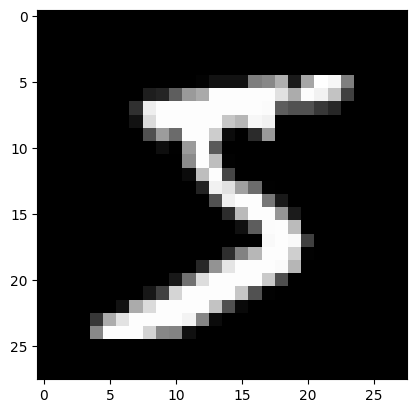

In [15]:
# 문제 데이터
plt.imshow(X_train[0], cmap='gray')

### MLP 모델링 (다중분류: 0~9까지의 손글씨 데이터를 예측)
- 입력층, 출력층 고려
- 학습능력을 위한 중간층의 깊이를 고려
- loss, metrics
- 학습결과 시각화를 통한 일반화 판단

In [18]:
# 도구 불러오기
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
# Flatten : 차원축소, 2차원의 이미지 데이터를 1차원으로 표현하기 위한 클래스

In [21]:
# 신경망 모델 설계
model = Sequential()
model.add(InputLayer(shape=(28,28)))  # 28,28의 2차원 데이터
model.add(Flatten()) # 입력받은 2차원의 이미지 데이터 -> 1차원(1차원 선형모델의 학습을 위함)
model.add(Dense(units=16, activation='sigmoid'))
model.add(Dense(units=8, activation='sigmoid'))
model.add(Dense(units=16, activation='sigmoid'))
# 출력층 -> 다중분류 : 지금 0~9, 10개의 클래스를 사용하고 있으므로
model.add(Dense(units=10, activation='softmax'))
# units = 클래스 개수
# softmax : 선형모델이 예측한 연속적인 결과를 총합이 1인 확률로 변경해주는 함수


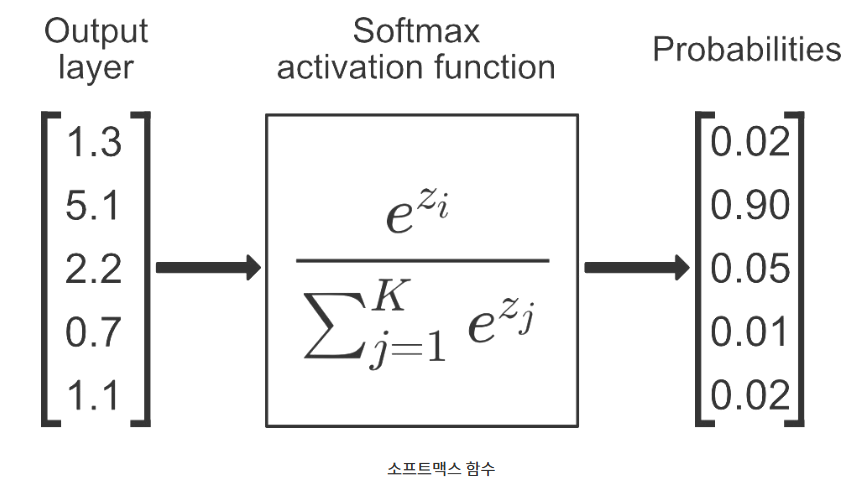

### 활성화 함수 활용(공식)
- 중간층 : 학습의 능력을 끌어올리기 위한 역할(복잡한 패턴학습) -> 적당한 함수 선택
- 출력층 : 예측 결과를 지정해주기 위해 사용 -> 패턴에 따라 다른 함수 선택
  - 회귀(units=1): linear(항등함수, y=x) 선형모델이 예측한 연속형데이터를 그대로 출력, activation 지정하지 않으면 설정되는 defaul값
  - 이진분류(units=1): sigmoid, 선형모델이 예측한 연속형 데이터를 0~1 사이의 확률값으로 변경
  - 다중분류(units=클래스 개수): softmax, 각가의 선형모델이 예측한 연속형 데이터를 총합이 1인 확률로 변경

In [22]:
# 학습방법 및 평가방법 설정
model.compile(loss='sparse_categorical_crossentropy', # 오차: categorical_crossentropy(다중분류)
              optimizer='SGD', metrics=['accuracy'])
# 다중분류 오차 : categorical_correntropy -> 문제발생!🔥🔥
# 모델이 출력한 결과와 실제 정답의 shape가 불일치(모델출력 결과 10, 정답 1)
# -> sparse_categorical_correntropy -> 내부적으로 알아서 shape 맞춰 학습 진행

# 예측값 vs 실제값 -> 오차
model.fit(X_train,y_train, validation_split=0.2, epochs=20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1233 - loss: 2.3049 - val_accuracy: 0.2063 - val_loss: 2.2693
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2315 - loss: 2.2563 - val_accuracy: 0.2113 - val_loss: 2.2015
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2519 - loss: 2.1725 - val_accuracy: 0.2353 - val_loss: 2.0643
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2821 - loss: 2.0166 - val_accuracy: 0.3252 - val_loss: 1.8623
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3759 - loss: 1.8082 - val_accuracy: 0.4300 - val_loss: 1.6471
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4377 - loss: 1.6095 - val_accuracy: 0.4795 - val_loss: 1.4829
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4692 - loss: 1.4602 - val_accuracy: 0.4853 - val_loss: 1.3839
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4668 - loss: 1.3745 - 

### loss : 오차 -> 학습 과정상 모델의 잘못된 정도를 나타내는 지표
- 오차를 줄여나가는 방향으로 학습(최적화 과정)
- 정답데이터의 패턴에 따라 다르게 설정
  - 회귀: mean_squared_error
  - 이진분류: binary_crossentropy
  - 다중분류: sparse_categorical_crossentropy

loss 범위:
- 최소값: 0
- 손실이 0인 경우는 모델이 완벽하게 예측한 경우입니다. 즉, 각 샘플에 대해 모델이 정확한 클래스를 예측했을 때 발생합니다.
- 최대값: 이론적으로 무한대에 가까운 값까지 갈 수 있습니다.
손실이 매우 커지는 경우는 모델이 잘못 예측하고 확신을 가지지 못하는 경우입니다. 예를 들어, 예측 확률이 거의 0에 가까운 잘못된 클래스를 예측하면 손실 값이 커질 수 있습니다.

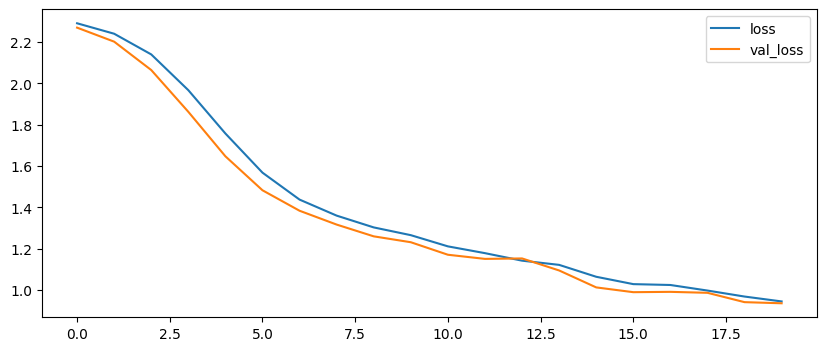

In [25]:
# 학습결과 시각화
plt.figure(figsize=(10,4))
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [26]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7016 - loss: 0.9882


[0.9400166869163513, 0.7232999801635742]

- 70% 정도의 정확도

### 다중분류 실습
- 학습의 성능을 높이기 위해 신경망 모델을 재설계

In [39]:
from tqdm.keras import TqdmCallback

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

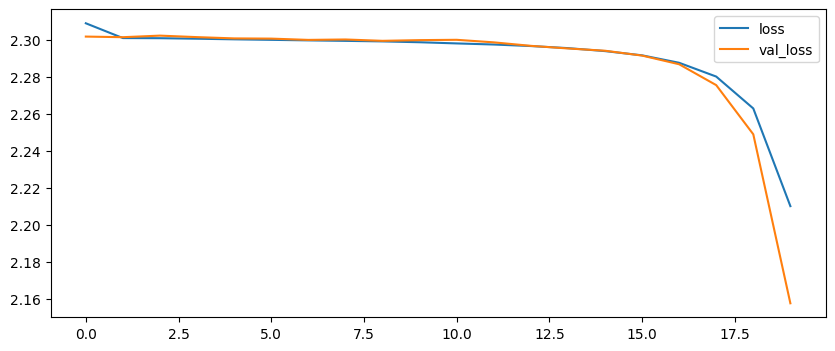

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2295 - loss: 2.1546
[2.1536734104156494, 0.22579999268054962]


In [40]:
model2 = Sequential()
model2.add(InputLayer(shape=(28,28)))
model2.add(Flatten())
model2.add(Dense(16, activation='sigmoid'))
model2.add(Dense(32, activation='sigmoid'))
model2.add(Dense(64, activation='sigmoid'))
model2.add(Dense(32, activation='sigmoid'))
model2.add(Dense(16, activation='sigmoid'))

model2.add(Dense(units=10, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy', # 오차: categorical_crossentropy(다중분류)
              optimizer='SGD', metrics=['accuracy'])

model2.fit(X_train,y_train, validation_split=0.2, epochs=20, verbose=0, callbacks=[TqdmCallback()])

plt.figure(figsize=(10,4))
plt.plot(model2.history.history['loss'], label='loss')
plt.plot(model2.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

print(model2.evaluate(X_test, y_test))

- loss = 2.1536734104156494
- ACC = 0.22579999268054962
<br><br>
- 다층구조에서 sigmoid를 사용하면 ACC가 떨어지게 된다
#### 층이 깊어지면 더 좋은 성능의 모델일 줄 알았는데 오히려 성능이 줄어듦 왜? -> sigmoid 기울기 소실 문제